## KNN(Kth Nearest Neighbour) For Digit Recognition

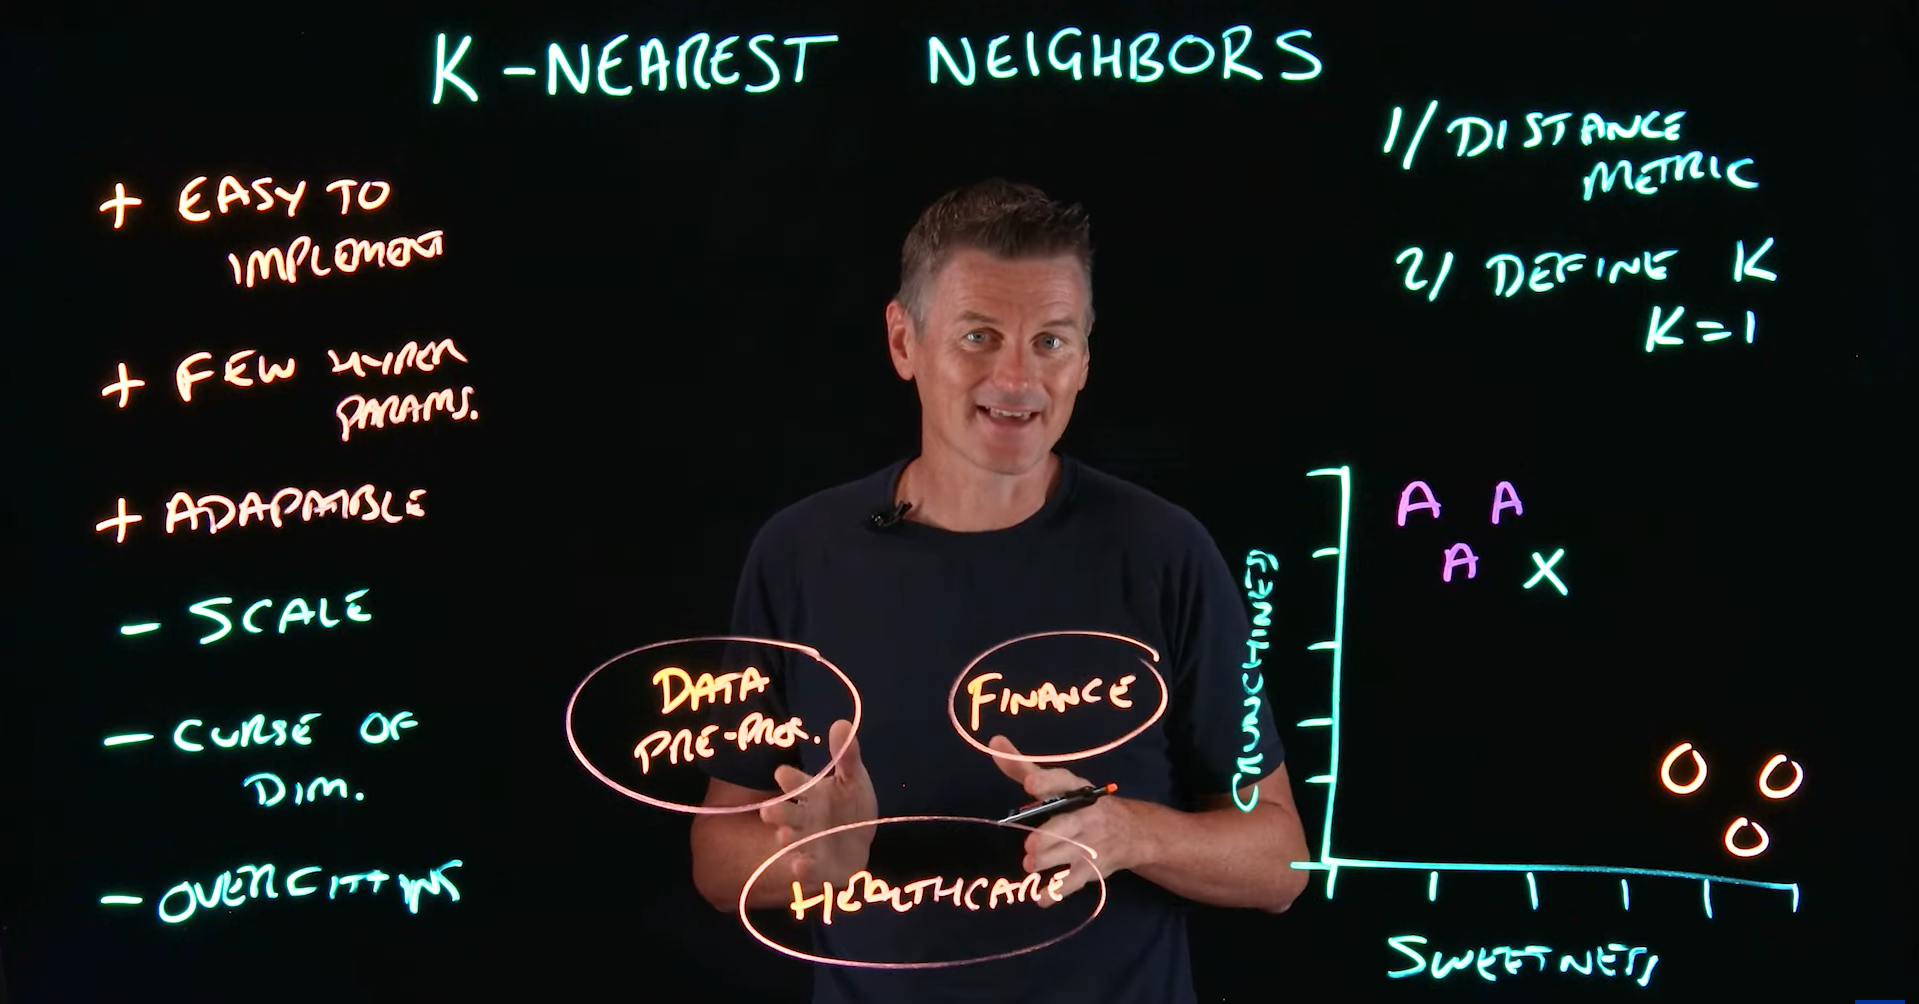

In [1]:
import pandas as pd

digits_df = pd.read_csv('data/digitRecognizer/train.csv')
digits_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split

X = digits_df.drop('label', axis=1).values
y = digits_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

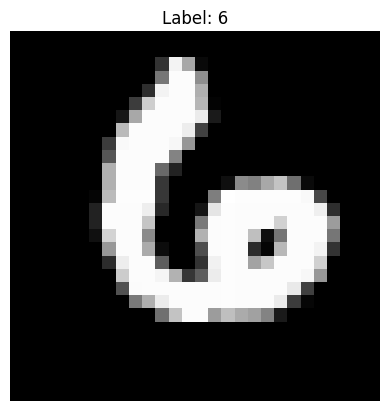

In [46]:
import matplotlib.pyplot as plt

id = 12

plt.imshow(X_train[id].reshape(28,28), cmap='gray')
plt.title(f"Label: {y_train[id]}")
plt.axis('off') # Hide axes for a cleaner look
plt.show()

In [20]:
from sklearn.decomposition import PCA

pca1 = PCA(0.90)

X_train_pca = pca1.fit_transform(X_train)
X_test_pca = pca1.transform(X_test)

variance_ratio = pca1.explained_variance_ratio_
variance_ratio

array([0.09814709, 0.07117875, 0.06190029, 0.05389149, 0.04922844,
       0.04318061, 0.03261443, 0.02887027, 0.02771072, 0.02337975,
       0.02088276, 0.02044919, 0.0170709 , 0.01676182, 0.01590384,
       0.01485426, 0.01321645, 0.0128615 , 0.01183401, 0.01150898,
       0.01072606, 0.01018726, 0.00965131, 0.00916707, 0.00883105,
       0.00830205, 0.00816395, 0.00774373, 0.00739022, 0.00691412,
       0.00659275, 0.00631798, 0.00603571, 0.0058961 , 0.00564784,
       0.00539101, 0.00508785, 0.00485739, 0.00472211, 0.00464943,
       0.00451361, 0.00443798, 0.00415147, 0.00395069, 0.0038411 ,
       0.00373687, 0.00358651, 0.00347814, 0.00334893, 0.00317686,
       0.00313203, 0.00307009, 0.00292784, 0.00285803, 0.00279775,
       0.00267348, 0.00265364, 0.00257192, 0.0025259 , 0.00245193,
       0.00241183, 0.00237777, 0.00227199, 0.00223084, 0.00215115,
       0.00205169, 0.00201316, 0.00196198, 0.00193194, 0.00188336,
       0.00185285, 0.00181506, 0.00175583, 0.00171244, 0.00164

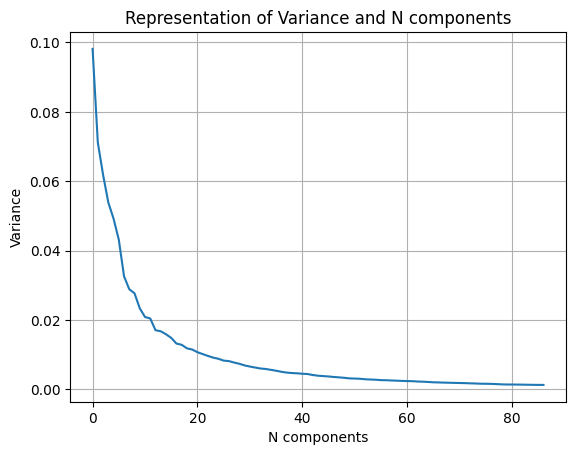

In [21]:
plt.plot(variance_ratio)
plt.xlabel('N components')
plt.ylabel('Variance')
plt.title("Representation of Variance and N components")
plt.grid()
plt.show()

## Shape Of The matrix after Principal Component Analysis

In [22]:
X_train_pca.shape, X_test_pca.shape

((29400, 87), (12600, 87))

## ML model training with the KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)


,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [35]:
y_pred = knn.predict(X_train_pca)

In [34]:
knn.score(X_train_pca, y_train), knn.score(X_test_pca, y_test)

(1.0, 0.9668253968253968)

## HyperParameter tuning

In [27]:
def scores(**kwargs):
    knn = KNeighborsClassifier(**kwargs)
    knn.fit(X_train_pca, y_train)
    train_score = knn.score(X_train_pca, y_train)
    test_score = knn.score(X_test_pca, y_test)

    return train_score, test_score

result_scores = []
train_score, test_score = scores(n_neighbors=3, weights='distance', p=1)
result_scores.append({
    "train_score": train_score,
    "test_score": test_score
})

result_scores

[{'train_score': 1.0, 'test_score': 0.9668253968253968}]

## On Test data


In [30]:
digit_test_df = pd.read_csv('data/digitRecognizer/test.csv')
digit_test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = digit_test_df.values
X_test = pca1.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)
knn.fit(X_train_pca, y_train)

,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
y_pred = knn.predict(X_test)

In [33]:
submission_df = pd.DataFrame({
    'ImageId': [i for i in range(1, 28001)],
    'label': y_pred
})
submission_df.to_csv('data/digitRecognizer/sample_submission.csv', index=False)

## Final Code

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# ----------------------
# 1. Prepare data
# ----------------------
X = digits_df.drop('label', axis=1).values
y = digits_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------
# 2. Apply PCA
# ----------------------
pca1 = PCA(0.90)
X_train_pca = pca1.fit_transform(X_train)
X_test_pca = pca1.transform(X_test)

# ----------------------
# 3. KNN on PCA data
# ----------------------
def scores(**kwargs):
    knn = KNeighborsClassifier(**kwargs)
    knn.fit(X_train_pca, y_train)
    train_score = knn.score(X_train_pca, y_train)
    test_score = knn.score(X_test_pca, y_test)
    return train_score, test_score

result_scores = []
for i in range(1, 150, 10):
    train_score, test_score = scores(n_neighbors=i, weights='distance', p=1)
    result_scores.append({
        "train_score": train_score,
        "test_score": test_score
    })


[{'train_score': 1.0, 'test_score': 0.9669047619047619},
 {'train_score': 1.0, 'test_score': 0.9603968253968254},
 {'train_score': 1.0, 'test_score': 0.9530952380952381},
 {'train_score': 1.0, 'test_score': 0.9458730158730159},
 {'train_score': 1.0, 'test_score': 0.940952380952381},
 {'train_score': 1.0, 'test_score': 0.937936507936508},
 {'train_score': 1.0, 'test_score': 0.9351587301587302},
 {'train_score': 1.0, 'test_score': 0.9316666666666666},
 {'train_score': 1.0, 'test_score': 0.9282539682539682},
 {'train_score': 1.0, 'test_score': 0.9263492063492064},
 {'train_score': 1.0, 'test_score': 0.9232539682539682},
 {'train_score': 1.0, 'test_score': 0.92},
 {'train_score': 1.0, 'test_score': 0.9188888888888889},
 {'train_score': 1.0, 'test_score': 0.915952380952381},
 {'train_score': 1.0, 'test_score': 0.9131746031746032}]

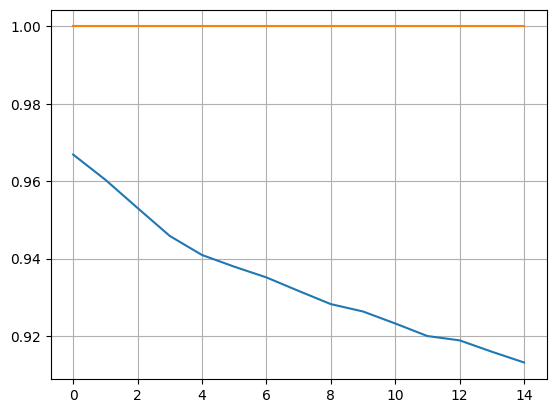

In [44]:
result = pd.DataFrame(result_scores)
plt.plot(result.test_score)
plt.plot(result.train_score)
plt.grid()

## Submission 

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# ----------------------
# 1. Load training data
# ----------------------
digits_df = pd.read_csv("data/digitRecognizer/train.csv")

X = digits_df.drop('label', axis=1).values
y = digits_df['label'].values

# Split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------
# 2. PCA (fit ONLY on training data)
# ----------------------
pca = PCA(0.95)   # 95% variance often works better than 90%
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)

# ----------------------
# 3. Train a strong KNN model
# ----------------------
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)
knn.fit(X_train_pca, y_train)

print("Train accuracy:", knn.score(X_train_pca, y_train))
print("Valid accuracy:", knn.score(X_valid_pca, y_valid))

# ----------------------
# 4. Prepare Kaggle test.csv
# ----------------------
test_df = pd.read_csv("data/digitRecognizer/test.csv")
X_test = test_df.values

# IMPORTANT: do NOT fit PCA again
X_test_pca = pca.transform(X_test)

# ----------------------
# 5. Predict
# ----------------------
y_pred = knn.predict(X_test_pca)

# ----------------------
# 6. Save submission
# ----------------------
submission_df = pd.DataFrame({
    'ImageId': range(1, len(y_pred) + 1),
    'Label': y_pred
})

submission_df.to_csv("submission.csv", index=False)


Train accuracy: 1.0
Valid accuracy: 0.9623809523809523
